In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_excel('/content/Energy_Consumption dataset.xlsx')
df

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,No,25.139433,43.431581,1565.693999,5.0,On,Off,2.774699,75.364373
1,1,1,Saturday,No,27.731651,54.225919,1411.064918,1.0,On,On,21.831384,83.401855
2,1,2,Saturday,No,28.704277,58.907658,1755.715009,2.0,Off,Off,6.764672,78.270888
3,1,3,Saturday,No,20.080469,50.371637,1452.316318,1.0,Off,On,8.623447,56.519850
4,1,4,Saturday,No,23.097359,51.401421,1094.130359,9.0,On,Off,3.071969,70.811732
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,12,6,Sunday,Yes,26.338718,52.580000,1563.567259,7.0,On,On,20.591717,70.270344
4996,12,17,Monday,No,20.007565,42.765607,1999.982252,5.0,Off,On,7.536319,73.943071
4997,12,13,Thursday,Yes,26.226253,30.015975,1999.982252,5.0,Off,On,28.162193,85.784613
4998,12,8,Saturday,Yes,24.673206,50.223939,1240.811298,2.0,On,On,20.918483,63.784001


In [3]:
df.head()

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,No,25.139433,43.431581,1565.693999,5.0,On,Off,2.774699,75.364373
1,1,1,Saturday,No,27.731651,54.225919,1411.064918,1.0,On,On,21.831384,83.401855
2,1,2,Saturday,No,28.704277,58.907658,1755.715009,2.0,Off,Off,6.764672,78.270888
3,1,3,Saturday,No,20.080469,50.371637,1452.316318,1.0,Off,On,8.623447,56.519850
4,1,4,Saturday,No,23.097359,51.401421,1094.130359,9.0,On,Off,3.071969,70.811732


In [4]:
df.tail()

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
4995,12,6,Sunday,Yes,26.338718,52.580000,1563.567259,7.0,On,On,20.591717,70.270344
4996,12,17,Monday,No,20.007565,42.765607,1999.982252,5.0,Off,On,7.536319,73.943071
4997,12,13,Thursday,Yes,26.226253,30.015975,1999.982252,5.0,Off,On,28.162193,85.784613
4998,12,8,Saturday,Yes,24.673206,50.223939,1240.811298,2.0,On,On,20.918483,63.784001
4999,12,1,Saturday,Yes,25.802872,41.798829,1793.658686,6.0,Off,Off,8.334079,53.263278


In [5]:
df.describe()

,Month,Hour,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,5000.000000,5000.000000,4750.000000,4750.000000,5000.000000,4750.000000,4750.000000,5000.000000
mean,6.251200,11.556000,24.952430,45.464412,1507.403201,4.575158,15.162982,76.794919
std,3.588687,6.888306,3.040004,8.990875,293.147209,2.905353,9.159186,9.231573
min,1.000000,0.000000,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,3.000000,6.000000,22.458232,38.109957,1253.906598,2.000000,7.438275,70.419588
50%,6.000000,11.000000,24.828990,45.703396,1513.581105,5.000000,15.302242,76.696267
75%,9.000000,18.000000,27.436995,52.725883,1754.846457,7.000000,22.839072,83.246274
max,12.000000,23.000000,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


In [6]:
df.dtypes

,0
Month,int64
Hour,int64
DayOfWeek,object
Holiday,object
Temperature,float64
Humidity,float64
SquareFootage,float64
Occupancy,float64
HVACUsage,object
LightingUsage,object


In [7]:
print(df.isna().sum())

Month                  0
Hour                   0
DayOfWeek              0
Holiday                0
Temperature          250
Humidity             250
SquareFootage          0
Occupancy            250
HVACUsage              0
LightingUsage          0
RenewableEnergy      250
EnergyConsumption      0
dtype: int64


In [8]:
#Fill missing values for numeric columns with their mean
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column]=df[column].fillna(df[column].mean())

In [9]:
#Convert categorical features to numerical using one-hot encoding
df=pd.get_dummies(df,columns=['DayOfWeek','Holiday','HVACUsage','LightingUsage'],drop_first=True)

In [10]:
#Separate features and target variable
X=df.drop('EnergyConsumption',axis=1).values
y=df['EnergyConsumption'].values
df

,Month,Hour,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Holiday_Yes,HVACUsage_On,LightingUsage_On
0,1,0,25.139433,43.431581,1565.693999,5.0,2.774699,75.364373,False,True,False,False,False,False,False,True,False
1,1,1,27.731651,54.225919,1411.064918,1.0,21.831384,83.401855,False,True,False,False,False,False,False,True,True
2,1,2,28.704277,58.907658,1755.715009,2.0,6.764672,78.270888,False,True,False,False,False,False,False,False,False
3,1,3,20.080469,50.371637,1452.316318,1.0,8.623447,56.519850,False,True,False,False,False,False,False,False,True
4,1,4,23.097359,51.401421,1094.130359,9.0,3.071969,70.811732,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,12,6,26.338718,52.580000,1563.567259,7.0,20.591717,70.270344,False,False,True,False,False,False,True,True,True
4996,12,17,20.007565,42.765607,1999.982252,5.0,7.536319,73.943071,True,False,False,False,False,False,False,False,True
4997,12,13,26.226253,30.015975,1999.982252,5.0,28.162193,85.784613,False,False,False,True,False,False,True,False,True
4998,12,8,24.673206,50.223939,1240.811298,2.0,20.918483,63.784001,False,True,False,False,False,False,True,True,True


In [11]:
df['Temperature'].value_counts()

,count
Temperature,
29.998671,289
20.007565,274
24.952430,250
22.777735,1
25.392704,1
...,...
26.816655,1
24.806256,1
28.506507,1


In [12]:
#Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [13]:
#Standardize the features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [14]:
#Train the linear regression model
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
#Make predictions
y_pred=model.predict(X_test)

In [16]:
#Evaluate the model
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 66.2347741101695
Root Mean Squared Error: 8.13847492532658
R-squared: 0.23603719534145473


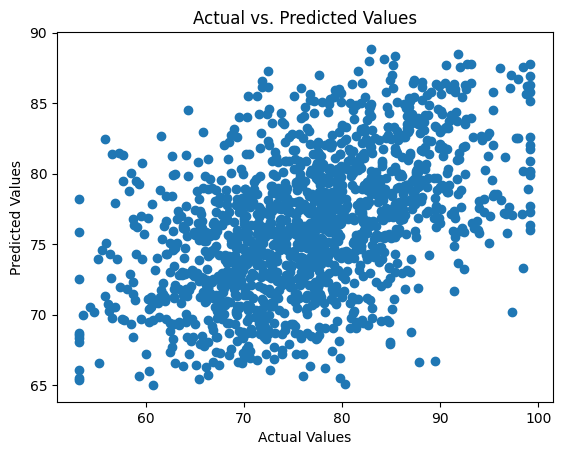

In [17]:
#Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()